In [1]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
from classes.paths import LocalPaths
from classes.classes import ColorManager
from evaluation.utils import load_wandb_runs
from classes.classes import MODEL_CONFIGS, NO_COSTS_MODEL_CONFIGS
from dotenv import load_dotenv

load_dotenv()
sns.set_theme(style="whitegrid", font_scale=1.8)
%load_ext autoreload
%autoreload 2

In [2]:
WANDB_PROJECT, WANDB_USER = os.environ["WANDB_PROJECT"], os.environ["WANDB_USER"]
RESULT_DIR = LocalPaths().data / "training"/ "results.csv"
MODEL_CONFS = MODEL_CONFIGS + NO_COSTS_MODEL_CONFIGS

In [3]:
training_results = load_wandb_runs(WANDB_USER, WANDB_PROJECT, RESULT_DIR, model_confs=MODEL_CONFS)
training_results

,model,database,seed,val_time,val_num_tuples,val_loss,val_std,val_mse,val_mape,val_median_q_error_50,val_median_q_error_95,val_median_q_error_100,test_time,no_test_points,display_name
0,postgres,baseball,2,NaN,NaN,NaN,NaN,4.431795,8.437770,7.760199,23.804813,60.607624,0.000393,5000.0,Sc. Postgres
1,postgres,imdb,2,NaN,NaN,NaN,NaN,7.600937,3.047728,3.495369,13.968419,25.392546,0.000537,10000.0,Sc. Postgres
2,postgres,tpc_h,2,NaN,NaN,NaN,NaN,5.940187,4.319689,2.833187,19.890733,25.848415,0.000354,10000.0,Sc. Postgres
3,postgres,baseball,1,NaN,NaN,NaN,NaN,4.427171,8.499110,7.771549,23.977192,59.395131,0.000286,5000.0,Sc. Postgres
4,postgres,tpc_h,1,NaN,NaN,NaN,NaN,5.933778,4.302132,2.828099,19.809247,25.733105,0.000423,10000.0,Sc. Postgres
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,qppnet_no_costs,baseball,1,8.355731,1856.0,3507931.75,2.971062,2.497905,1.639944,1.418542,12.298135,13517.202148,NaN,NaN,QPP-Net\n(w/o PG costs)
174,qppnet_no_costs,imdb,1,3.382716,640.0,16425838.00,5.967769,3.394998,146.127365,1.370440,7.271860,32027.410156,NaN,NaN,QPP-Net\n(w/o PG costs)
175,qppnet_no_costs,imdb,0,3.248177,640.0,17915630.00,5.610331,3.991352,14.085789,1.403884,19.457345,14471.849609,NaN,NaN,QPP-Net\n(w/o PG costs)
176,qppnet_no_costs,tpc_h,0,5.192949,768.0,9234740.00,5.078401,2.761478,10.122352,1.223604,36.098399,5898.241211,NaN,NaN,QPP-Net\n(w/o PG costs)


/var/folders/6f/l772vx1s4zd9xhd99kx9535h0000gn/T/ipykernel_62494/3972920012.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  q50.set_xticklabels(q50.get_xticklabels(), rotation=0)


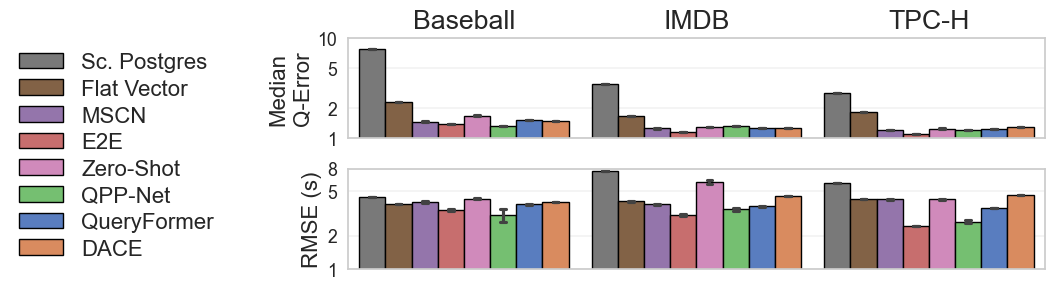

In [5]:
fontsize = 16
fig, (q50, rmse) = plt.subplots(2, 1, figsize=(9, 3))

training_results = training_results[training_results.model.isin([model_config.name.NAME for model_config in MODEL_CONFS])]
training_results['display_name'] = training_results.model.map(
    {model_config.name.NAME: model_config.name.DISPLAY_NAME for model_config in MODEL_CONFIGS})
order = [model_config.name.NAME for model_config in MODEL_CONFIGS]
training_results = training_results.set_index('model').loc[order].reset_index()

# ---------------------------- Plot Q50 ---------------------------- #
q50 = sns.barplot(x="database",
                  y="val_median_q_error_50",
                  hue="display_name",
                  data=training_results,
                  errorbar=('ci', 50),
                  capsize=.2,
                  ax=q50,
                  width=0.9,
                  palette=ColorManager.COLOR_PALETTE,
                  edgecolor='black')

q50.set_ylim(1, 8)
q50.set_yscale("log")
q50.set_ylabel("Median\nQ-Error", fontsize=fontsize)
q50.set_xlabel("", fontsize=fontsize)
q50.grid(True, which='both', linewidth=0.3)
q50.tick_params(axis='x', which='both', labelsize=fontsize * 1.2, length=0)
q50.tick_params(axis='y', which='both', labelsize=fontsize * 0.8)
q50.set_yticks([1, 2, 5, 10], labels=[1, 2, 5, 10], minor=True, fontsize=fontsize * 0.8)
q50.set_xticklabels(q50.get_xticklabels(), rotation=0)
q50.set_yticks([], minor=False)
q50.xaxis.set_ticks_position('top')
q50.grid(True, axis='x', which='minor')
q50.grid(False, axis='x', which='major')
q50.set_xticks(ticks=["tpc_h", "imdb", "baseball"],
               labels=["TPC-H", "IMDB", "Baseball"],
               minor=False)
"""
for container in q50.containers:
    q50.bar_label(container=container,
                  rotation=90,
                  fontsize=0.65 * fontsize,
                  fmt="%2.2f",
                  padding=3)
"""
q50.get_legend().remove()

# ---------------------------- Plot RMSE ---------------------------- #
rmse = sns.barplot(x="database",
                   y="val_mse",
                   hue="display_name",
                   data=training_results,
                   errorbar=('ci', 50),
                   capsize=.2,
                   ax=rmse,
                   width=0.9,
                   palette=ColorManager.COLOR_PALETTE,
                   edgecolor='black')

rmse.set_ylim(1, 8)
rmse.set_yscale("log")
rmse.set_ylabel("RMSE (s)", fontsize=fontsize)
rmse.set_xlabel("", fontsize=fontsize)
rmse.grid(True, which='both', linewidth=0.3)
rmse.tick_params(axis='x', which='both', labelsize=fontsize * 1.2)
rmse.tick_params(axis='y', which='both', labelsize=fontsize * 0.8)
rmse.set_xticklabels([])
rmse.set_yticks([1, 2, 5, 8], labels=[1, 2, 5, 8], minor=True, fontsize=fontsize * 0.8)
rmse.set_yticks([], minor=False)
rmse.grid(True, axis='x', which='minor')
rmse.grid(False, axis='x', which='major')
"""
for container in rmse.containers:
    rmse.bar_label(container=container,
                   rotation=90,
                   fmt="%2.2f",
                   padding=3,
                   fontsize=0.65 * fontsize,
                   label_type='edge')
"""
lgd = rmse.legend(ncol=1,
                  fontsize=fontsize,
                  facecolor='white',
                  edgecolor='white',
                  title_fontsize=fontsize,
                  framealpha=1,
                  loc='lower left',
                  bbox_to_anchor=(-0.5, -0.1),
                  labelspacing=0.3)

plt.subplots_adjust(hspace=0.3)
path = LocalPaths().plotting_path / "training_scores.pdf"
plt.savefig(path, bbox_extra_artists=(lgd,), bbox_inches='tight')